In [5]:
from google.colab import files
import pandas as pd

uploaded = files.upload()
df = pd.read_csv("raw_dataset_week4.csv")
print(df.head())


Saving salesbi.csv to salesbi.csv
   Customer_ID  Age  Gender    Income  Spending_Score  Credit_Score  \
0            1   56  Female  142418.0               7         391.0   
1            2   69    Male   63088.0              82         652.0   
2            3   46    Male  136868.0              91         662.0   
3            4   32  Female       NaN              34         644.0   
4            5   60    Male   59811.0              91         469.0   

   Loan_Amount  Previous_Defaults  Marketing_Spend  Purchase_Frequency  \
0       8083.0                  1            15376                   3   
1      34328.0                  2             6889                   6   
2      47891.0                  2             6054                  29   
3      25103.0                  2             4868                   8   
4      44891.0                  1            17585                  12   

  Seasonality  Sales  Customer_Churn  Defaulted  
0         Low  32526               0        

In [15]:
print("Missing values per column:\n", df.isnull().sum())
df.fillna(df.mean(numeric_only=True), inplace=True)


Missing values per column:
 Customer_ID           0
Age                   0
Gender                0
Income                0
Spending_Score        0
Credit_Score          0
Loan_Amount           0
Previous_Defaults     0
Marketing_Spend       0
Purchase_Frequency    0
Seasonality           0
Sales                 0
Customer_Churn        0
Defaulted             0
dtype: int64


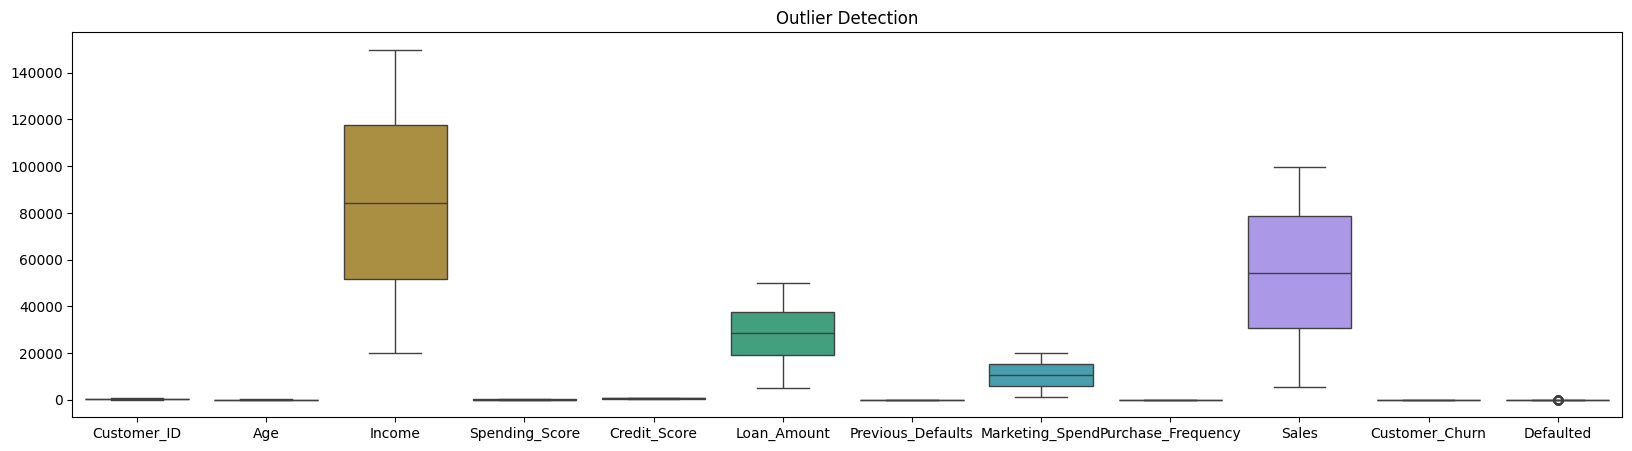

Shape before: (500, 14)  | Shape after removing outliers: (405, 14)


In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Fill with Mean
df.fillna(df.mean(numeric_only=True), inplace=True)

# Detect Outliers (Boxplot)
plt.figure(figsize=(20,5))
sns.boxplot(data=df.select_dtypes(include=[np.number]))
plt.title("Outlier Detection")
plt.show()

# Step 5. Selecting Numeric Columns
numeric_df = df.select_dtypes(include=[np.number])

# Step 6. Compute Interquartile Range (IQR)
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

# Step 7. Create Mask to Remove Outliers
mask = ~((numeric_df < (Q1 - 1.5 * IQR)) |
         (numeric_df > (Q3 + 1.5 * IQR))).any(axis=1)


# Step 8. Applying Mask to the DataFrame
df_clean = df[mask].copy()

# Step 9. Print Shape Before and After
print("Shape before:", df.shape, " | Shape after removing outliers:", df_clean.shape)


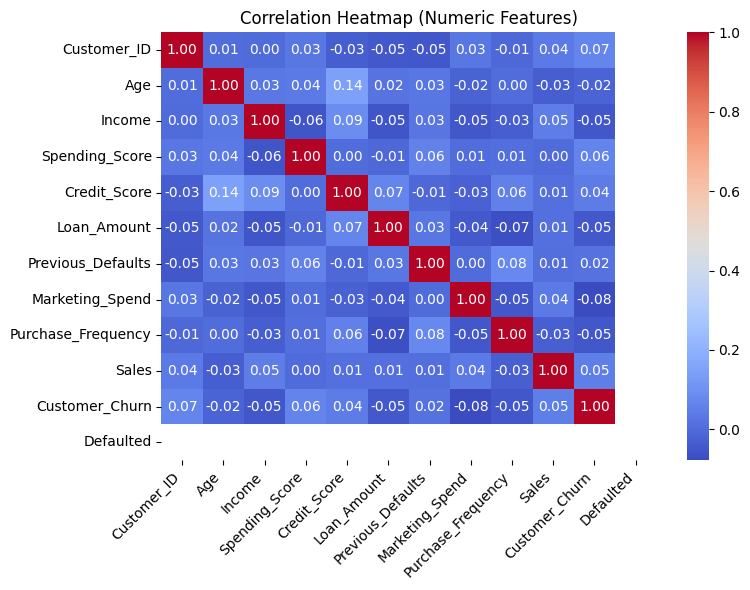

In [22]:
# Selecting numeric columns
numeric_df = df_clean.select_dtypes(include=[np.number])

# Plot correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(
    numeric_df.corr(),
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)

# Adding titles and formatting
plt.title("Correlation Heatmap (Numeric Features)")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


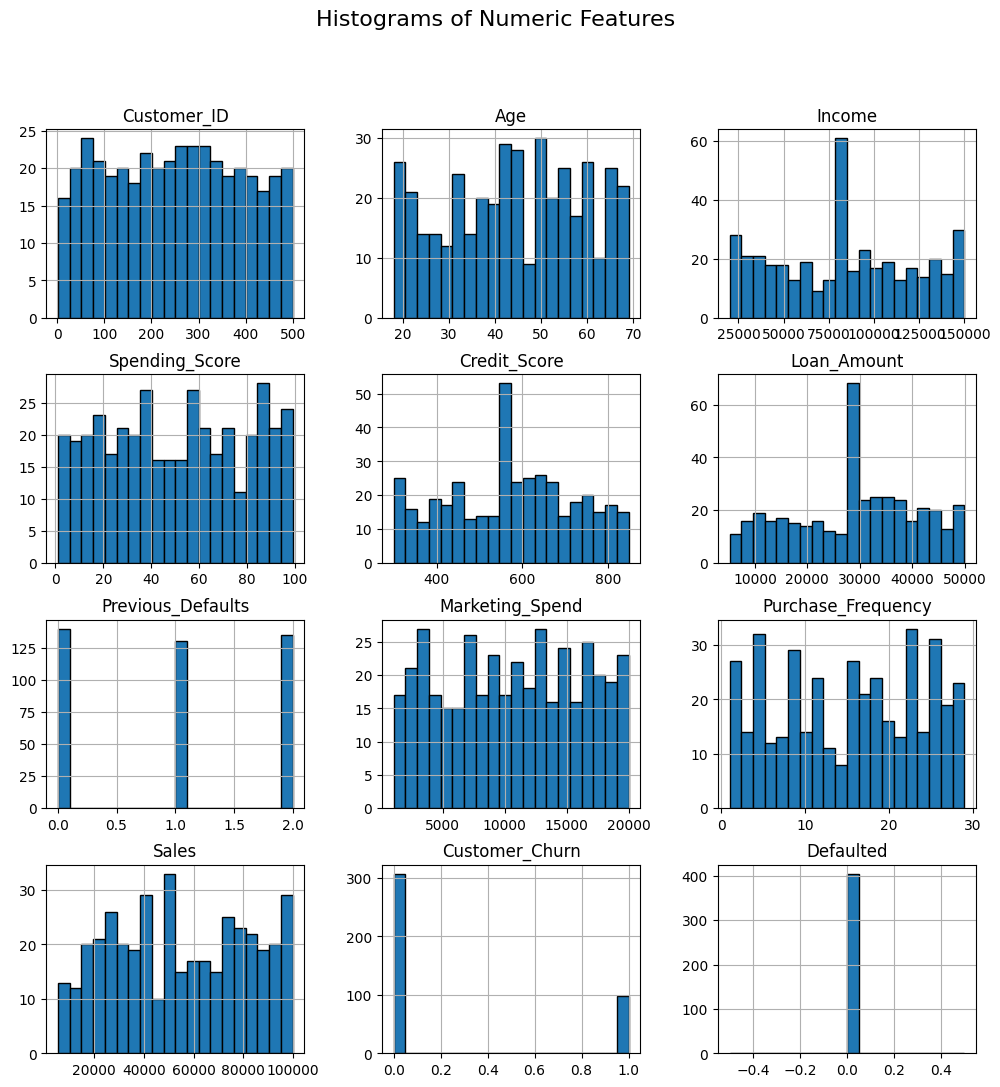

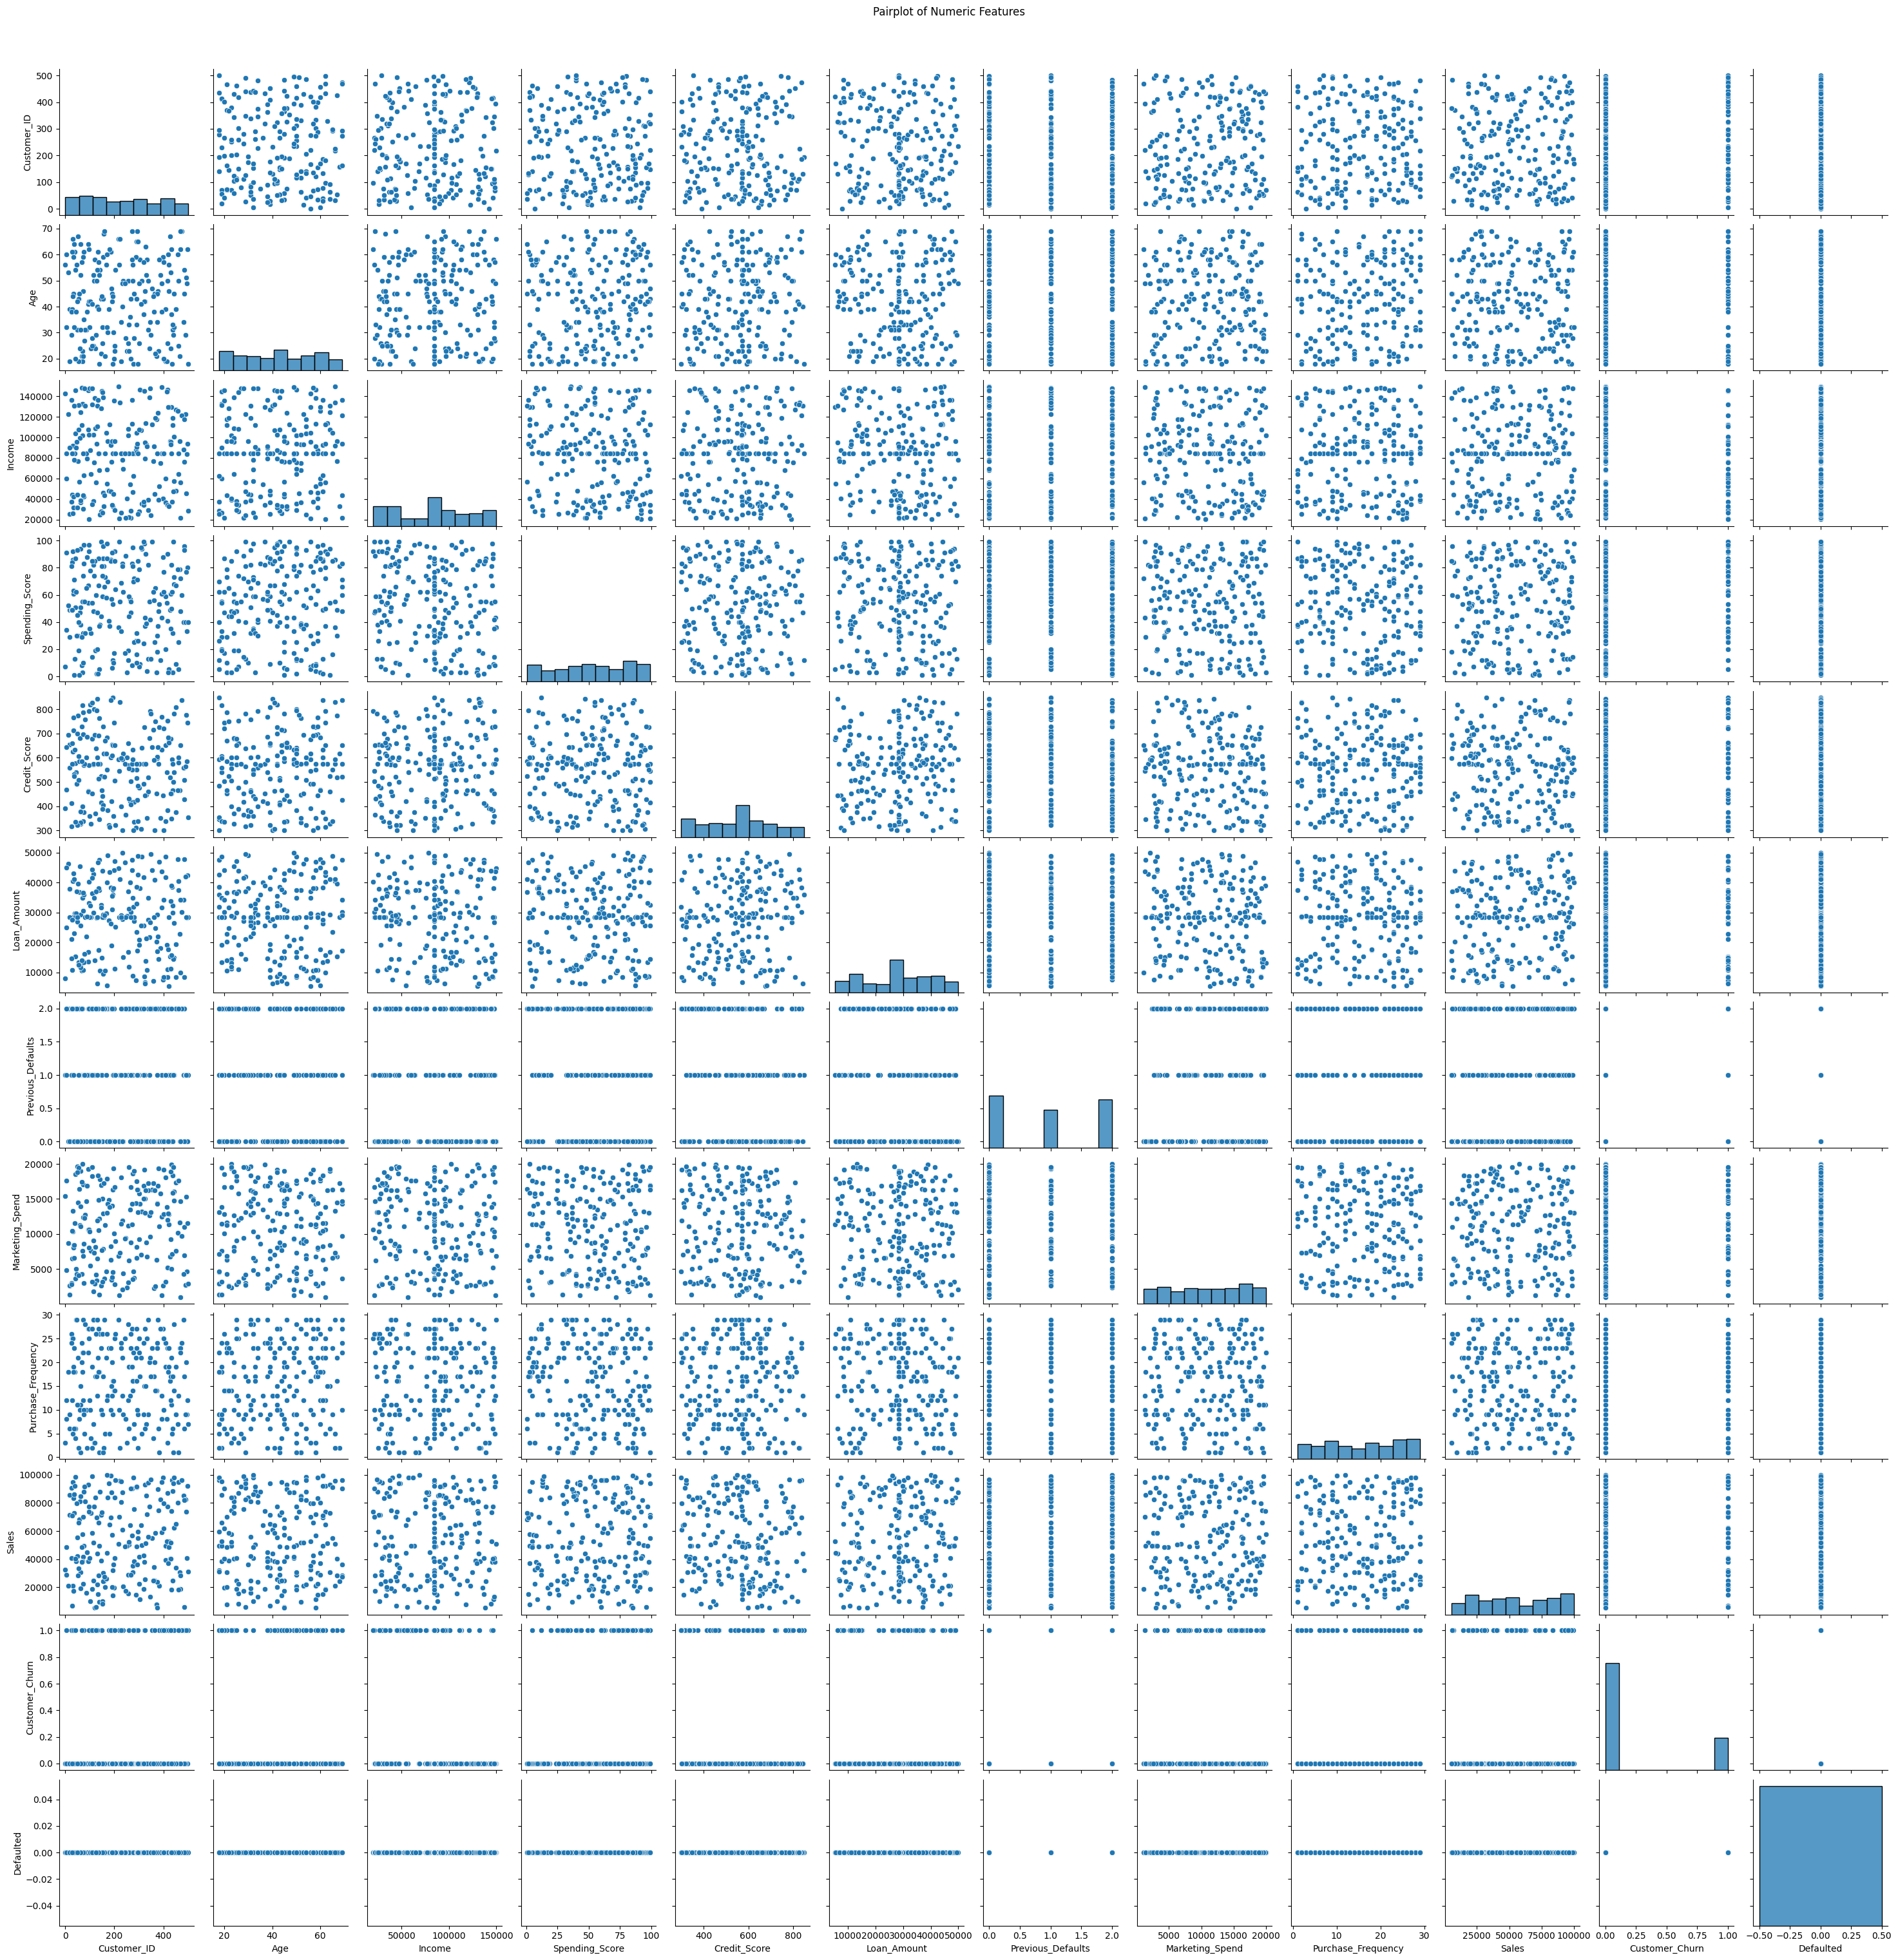

Model Evaluation:
Mean Squared Error: 776187377.00
R² Score: -0.06
Report and model saved successfully!


In [25]:
# Histograms for numeric features
numeric_df.hist(figsize=(12,12), bins=20, edgecolor="black")
plt.suptitle("Histograms of Numeric Features", fontsize=16)
plt.show()

sns.pairplot(numeric_df.sample(min(200, len(numeric_df))))
plt.suptitle("Pairplot of Numeric Features", y=1.02)
plt.show()


# Model Training

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# Assume target column is 'Sales'
X = numeric_df.drop(columns=["Sales"])
y = numeric_df["Sales"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# Export Predictive Model Report
results = {
    "MSE": mse,
    "R2": r2,
    "Coefficients": model.coef_,
    "Intercept": model.intercept_
}

# Save results to a text file
with open("predictive_model_report.txt", "w") as f:
    for key, value in results.items():
        f.write(f"{key}: {value}\n")

# Save trained model
joblib.dump(model, "sales_prediction_model.pkl")

print("Report and model saved successfully!")
